<h2>Q4:由學術動機與抑鬱值、心理壓力的相關性，以探討學習的熱忱越高是否會降低抑鬱值</h2>

In [37]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.stats
import statsmodels.stats.weightstats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
# read in our data
med_df = pd.read_csv("C:/Users/ASUS/Desktop/Data Carrard et al. 2022 MedTeach.csv")
med_df.head(5)

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


<h2>描述統計</h2>
<h3>透過heatmap圖，得到學術動機(asmp)、抑鬱值(cesd)、心理壓力(psyt) 彼此的相關係數</h3>

Text(0.5, 1.0, 'Correlation of motivation, melancholy,and psychological stress')

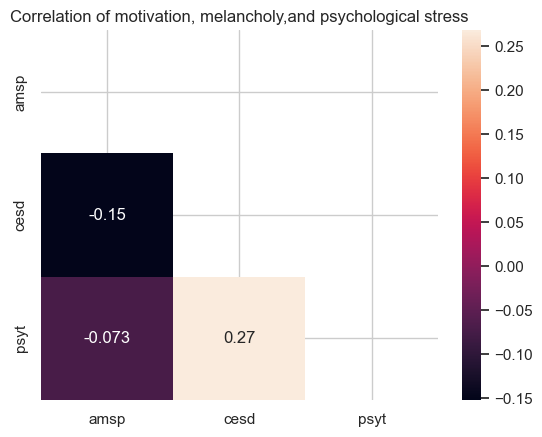

In [34]:
categorical = med_df[['amsp', 'cesd', 'psyt']].copy()
corr = categorical.corr()
matrix = np.triu(corr)
# using the upper triangle matrix as mask 
ax = sb.heatmap(corr, annot=True, mask=matrix)
ax.set_title("Correlation of motivation, melancholy,and psychological stress")

<h3>學術動機和抑鬱值與心理壓力的相關係數，分別為-0.15, -0.073</h3>

<h3>利用折線圖簡單觀察，當學術熱忱越高時，抑鬱值和心理壓力的變化</h3>

[(0.0, 45.0), (5.0, 39.0)]

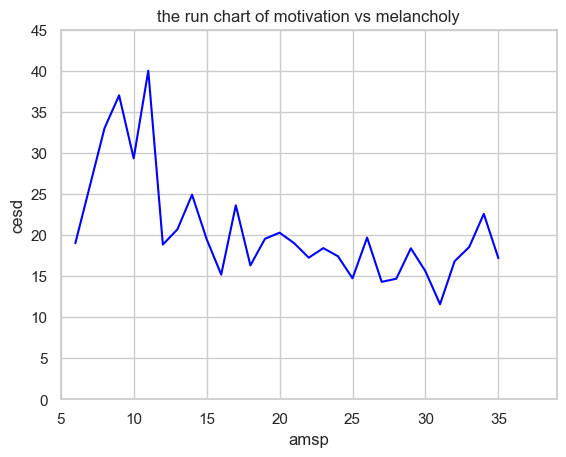

In [35]:
# amsp、 cesd、psyt
sb.set(style="whitegrid")
categorical2 = med_df[["amsp", "cesd"]].copy()
ax = sb.lineplot(data = med_df,x=med_df["amsp"], y= med_df["cesd"], color='blue',err_style=None,linewidth=1.5)
ax.set_title("the run chart of motivation vs melancholy")
ax.set(ylim=(0,45),xlim=(5,39))


<h3>直觀上，根據相關係數和這張圖表，可以看出當學術動機越高，抑鬱值會降低</h3>

[(0.0, 1.0), (5.0, 38.0)]

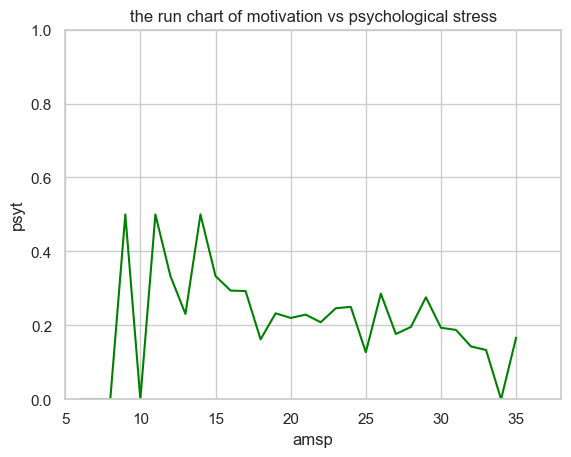

In [36]:
categorical3 = med_df[["amsp", "psyt"]].copy()
ax = sb.lineplot(data = med_df,x=med_df["amsp"], y= med_df["psyt"], color='green',err_style=None,linewidth=1.5)
ax.set_title("the run chart of motivation vs psychological stress")
ax.set(ylim=(0,1),xlim=(5,38))

<h3>直觀上，根據相關係數和這張圖表，可以看出當學術動機越高，心理壓力會降低，但幅度較小</h3>



<h2>檢定統計</h2>
<h3>檢定學術動機和抑鬱值的關聯性 : 卡方檢定</h3>

H0: 學術動機和抑鬱值無關

H1: 學術動機和抑鬱值有關

In [39]:
chi2_table = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Chi-Square', 'p-value'])
chi2, p, dof, ex = chi2_contingency(pd.crosstab(med_df["amsp"], med_df["cesd"]))
chi2_table = chi2_table.append({'Variable 1': "amsp", 'Variable 2': "cesd", 'Chi-Square': chi2, 'p-value': p}, ignore_index=True)
chi2_table

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14492\3339606424.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi2_table = chi2_table.append({'Variable 1': "amsp", 'Variable 2': "cesd", 'Chi-Square': chi2, 'p-value': p}, ignore_index=True)


,Variable 1,Variable 2,Chi-Square,p-value
0,amsp,cesd,2012.380064,6.959344e-17


<h3>
p-value = 6.959344e-17 < 0.05 ， 我們棄卻H0

所以在顯著水準0.05的情況下，學術動機和抑鬱值有關
</h3>

<h3>檢定學術動機和心理壓力的關聯性 : 卡方檢定</h3>

H0: 學術動機和心理壓力無關

H1: 學術動機和心理壓力有關

In [40]:
chi2_table = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Chi-Square', 'p-value'])
chi2, p, dof, ex = chi2_contingency(pd.crosstab(med_df["amsp"], med_df["psyt"]))
chi2_table = chi2_table.append({'Variable 1': "amsp", 'Variable 2': "psyt", 'Chi-Square': chi2, 'p-value': p}, ignore_index=True)
chi2_table

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14492\2054695125.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi2_table = chi2_table.append({'Variable 1': "amsp", 'Variable 2': "psyt", 'Chi-Square': chi2, 'p-value': p}, ignore_index=True)


,Variable 1,Variable 2,Chi-Square,p-value
0,amsp,psyt,22.693504,0.748221


<h3>
p-value = 0.748221 > 0.05 ， 我們不棄卻H0

所以在顯著水準0.05的情況下，學術動機和心理壓力無關
</h3>

<h2>線性迴歸分析</h2>

既然學術動機和抑鬱值有關，那麼我們可以建造一個線性迴歸模型，用學術動機去預測抑鬱值的大小

In [48]:
#import
from sklearn.linear_model import LinearRegression

In [51]:
x_data = np.array(med_df["amsp"]).reshape((-1,1))
y_data = np.array(med_df["cesd"])
model = LinearRegression()
model.fit(x_data,y_data)

#regression line
y_predict = model.coef_ * x_data + model.intercept_
text_w = 'y = ' + str(float(model.coef_.round(3))) + '*x' + ' + ' + str(model.intercept_.round(3))
print(f"Regression Line: {text_w}")
#預測
x_new = [10,20,30]
y_new = model.coef_ * x_new  + model.intercept_
print(f"當學習動機是{x_new}時，抑鬱值的預測值為{y_new}")

Regression Line: y = -0.35*x + 26.143
當學習動機是[10, 20, 30]時，抑鬱值的預測值為[22.64736559 19.1519009  15.6564362 ]


<h3>
Regression Line: y = -0.35*x + 26.143

當學習動機的值是[10, 20, 30]時，抑鬱值的預測值為[22.64736559, 19.1519009, 15.6564362 ]
</h3>

<h2>結論</h2>

<h3>
學術動機和抑鬱值相關 ， 學術動機和心理壓力的無關
</h3>
<h3>
而且透過線性迴歸模型，可以知道當學術動機越高時，抑鬱值會明顯下降
</h3>
<h3>
可能是因為有強烈的學習動機，就會較有耐心的學習，較不會感到憂鬱
</h3>